# Exercise 2

Aurel Mueller-Schoenau and Leon Oleschko  
25.11.2022

In [2]:
# import stuff
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## 1. Exercise - Distributions

### a) Binomial and Poisson Distribution

Show the Distributions for different parameters:  
Binomial: $n=[2, 10, 100], p=0.1$  
Poisson: $\lambda=1$

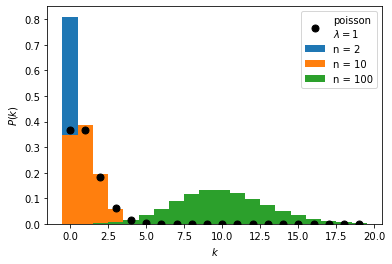

In [2]:
# plot the the binomial and poisson distribution

k = range(20)

n = [2, 10, 100]

for i in n:
    plt.bar(k, stats.binom.pmf(k, i, 0.1), 
        label='n = {}'.format(i),
        width=1
    )

plt.plot(k, stats.poisson.pmf(k, 1), "ko",
        label='poisson\n$\lambda=1$',
        ms=7
    )
    
plt.xlabel("$k$");
plt.ylabel("$P(k)$")
plt.legend()
plt.show()

Compare the Mean of the Distributions:

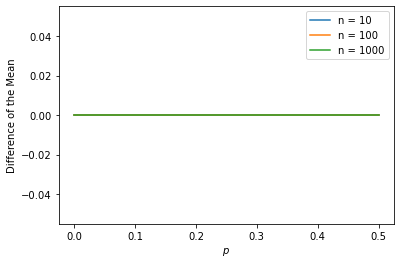

In [3]:
# compare the binomial and poisson distribution
# for n -> infinity, p -> 0, lambda = n*p

p = np.linspace(0.5, 1e-5, 100)
n = [10, 100, 1000]

for i in n:
    # plot the difference of the means
    plt.plot(p, stats.binom.mean(i, p) - stats.poisson.mean(i*p), label="n = {}".format(i))

plt.ylabel("Difference of the Mean")
plt.xlabel(r"$p$")
plt.legend()
plt.show()

The mean of the two distributions is for different p,n the same.

But the variance isn't:

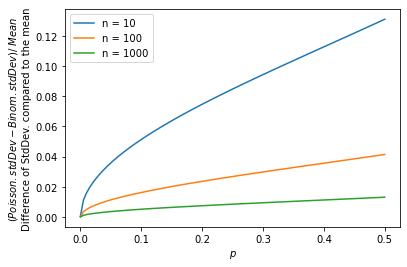

In [4]:
# compare the binomial and poisson distribution
# for n -> infinity, p -> 0, lambda = n*p

p = np.linspace(0.5, 1e-5, 100)
n = [10, 100, 1000]

for i in n:
    # plot the difference of the means
    plt.plot(p, (stats.poisson.std(i*p)-stats.binom.std(i, p))/stats.binom.mean(i, p),
          label="n = {}".format(i)
        )

plt.ylabel(r"$(Poisson.stdDev - Binom.stdDev) /\; Mean$" + "\nDifference of StdDev. compared to the mean")
plt.xlabel(r"$p$")
plt.legend()
plt.show()

In the plot above the difference of the standart deviation between the two distribution is plotted for different $p$. The difference is normalized to the mean.\
The difference goes to $0$ for $p\to 0$. 

### b) Binominal and Normal Distribution

Plot the Two distributions:  
Binomial: $n=[10, 50, 100]$, $p=0.5$  
Normal: $\mu=n\cdot p$, $\sigma=\sqrt{n\cdot p\cdot (1-p)}$

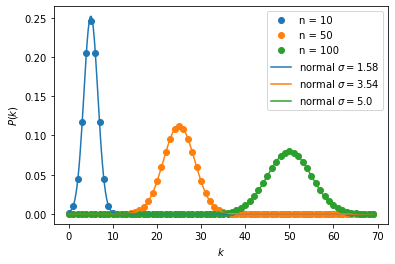

In [5]:
# plot the the binomial and normal distribution

k = range(70)

n = [10, 50, 100]

for i in n:
	plt.plot(k, stats.binom.pmf(k, i, 0.5), "o",
		label='n = {}'.format(i)
	)

	
# plot the normal distribution
k = np.linspace(0, max(k), 300)
plt.gca().set_prop_cycle(None) # reset the colors
for i in n:
	sigma = stats.binom.std(i, 0.5)
	plt.plot(k, stats.norm.pdf(k, 0.5*i, sigma),
		label='normal $\sigma = {}$'.format(round(sigma, 2))
	)

	

plt.xlabel("$k$");
plt.ylabel("$P(k)$")
plt.legend()
plt.show()

Mean and standart deviation can be chosen to be the same.

### c) Poisson and Normal Distribution

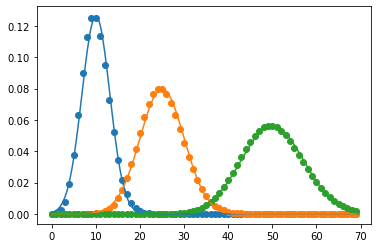

In [87]:
# plot the poisson and normal distribution

k = range(70)

n = [10, 25, 50]

for i in n:
	plt.plot(k, stats.poisson.pmf(k, i), "o",
		label='n = {}'.format(i)
	)


# plot the normal distribution
k = np.linspace(0, max(k), 300)
sigma = stats.poisson.std(i)

plt.gca().set_prop_cycle(None) # reset the colors
for i in n:
	sigma = stats.poisson.std(i)
	plt.plot(k, stats.norm.pdf(k, i, sigma),
		label='normal $\sigma = {}$'.format(round(sigma, 2))
	)

plt.show()

When $n\to\infty$ the Poisson distribution converges to the Normal distribution.

## 2. Exercise - Poisson Distribution

### a) DNA

DNA errors have a Poisson distribution with $p = \frac{1}{50\cdot 10^6}$.  
What is the distribution of the error count in $135\cdot 10^6$ bases pairs? 

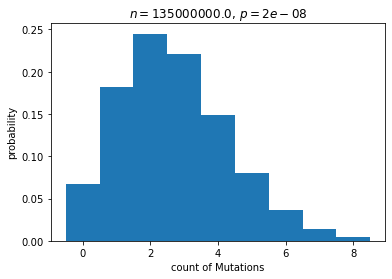

In [6]:
# plot the probability of different numbers of mutations

# define parameters
n = 135e6; # 135 Mio base pairs
p = 1/50e6; # 1/50 Mio 
x = np.arange(0, 9, 1)

plt.bar(x, stats.poisson.pmf(x, n*p),
	label='poisson pmf',
    width=1
)
plt.xlabel('count of Mutations')
plt.ylabel('probability')
plt.title(f'$n = {n}$, $p = {p}$')
plt.show()

### b) Density distribution

Plot the standart deviation of the Poisson distribution for different $\lambda = \rho\;\Delta V$ to show that for $\Delta V\to 0$ the deviation $\sigma\to 0$.  
Therefore only the mean is important.

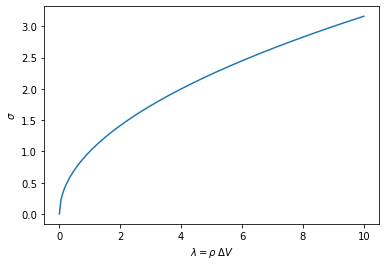

In [33]:
# plot the standard deviation of the poisson distribution

lam = np.linspace(0, 10, 200)

plt.plot(lam, stats.poisson.std(lam), label='poisson std')

plt.xlabel(r'$\lambda = \rho\;\Delta V$')
plt.ylabel(r'$\sigma$')
plt.show()

Plot as an example a Poisson distribution:

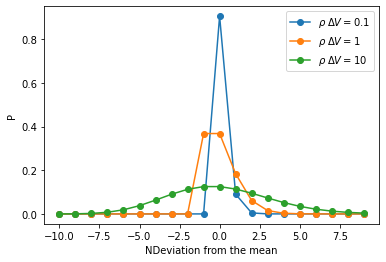

In [83]:
# plot the poisson distribution for different values of lambda

lam = [0.1, 1, 10]
x = np.arange(-10, 10)

for i in lam:
    plt.plot(x, stats.poisson.pmf(x+stats.poisson.median(i), i), "o-",
        label=f'$\\rho\\;\\Delta V = {i}$'
    )

plt.xlabel('NDeviation from the mean')
plt.ylabel('P')
plt.legend()
plt.show()